In [61]:
#data processing
import pandas as pd
import numpy as np

#data visualizations
import seaborn as sns
import matplotlib.pyplot as plt

#Machine learning library
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

!gdown --id 1RbIriDgpdKUNe4GbnUnRWKeKpFEj-bDz
!unzip /content/datasets.zip

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1RbIriDgpdKUNe4GbnUnRWKeKpFEj-bDz
To: /content/datasets.zip
100% 255k/255k [00:00<00:00, 98.7MB/s]
Archive:  /content/datasets.zip
replace datasets/boston_house_prices.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace datasets/brazilian_houses.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace datasets/goodreads_books.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace datasets/iris.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


####**Load datasets**

In [62]:
df_brazilian_houses = pd.read_csv("/content/datasets/brazilian_houses.csv")
df_books = pd.read_csv("/content/datasets/goodreads_books.csv")
df_boston_houses = pd.read_csv("/content/datasets/boston_house_prices.csv")
df_iris = pd.read_csv("/content/datasets/iris.csv")

Datasets information

In [63]:
d = {"brazilian_houses": [len(df_brazilian_houses), len(df_brazilian_houses.columns)],
     "boston_houses": [len(df_boston_houses), len(df_boston_houses.columns)],
     "iris": [len(df_iris), len(df_iris.columns)],
"books": [len(df_books), len(df_books.columns)],
}
print ("{:<18} {:<22} {:<33}".format("dataset", "number of instances", "number of attributes"))
for k, v in d.items():
    perc, change = v
    print ("{:<25} {:<25} {:<18}".format(k, perc, change))

dataset            number of instances    number of attributes             
brazilian_houses          10692                     12                
boston_houses             506                       14                
iris                      150                       5                 
books                     11127                     5                 


####**Histogram distribution visualisation and boxplot distribution.**

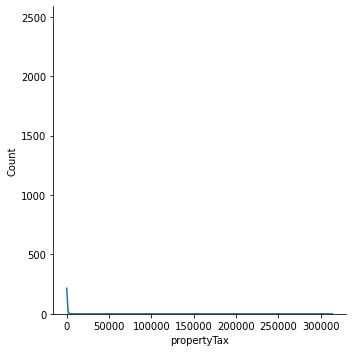

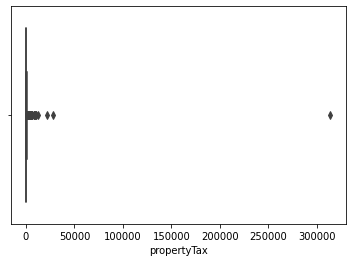

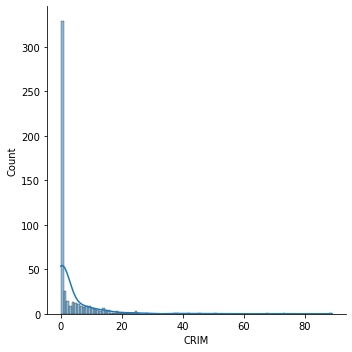

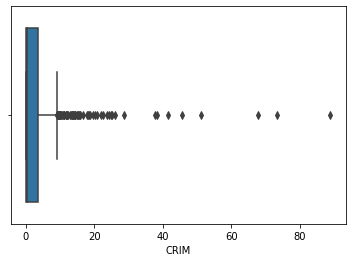

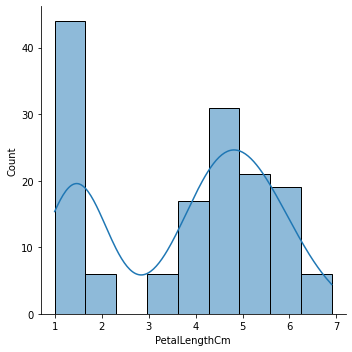

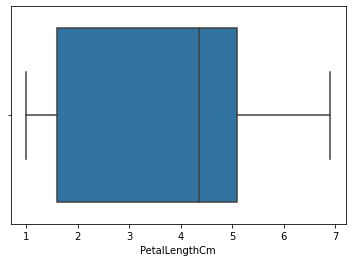

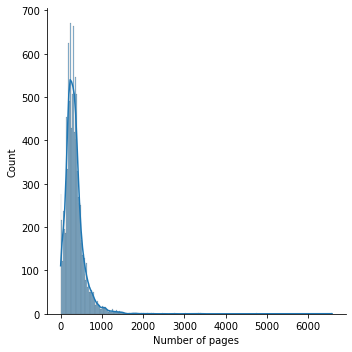

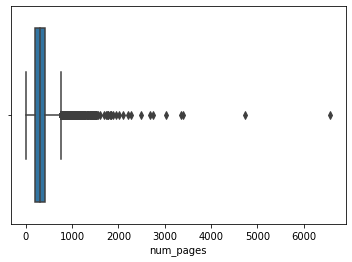

In [64]:
sns.displot(df_brazilian_houses['propertyTax'], kde = True)
#label the axis
plt.xlabel('propertyTax')
plt.ylabel("Count")
plt.show()
sns.boxplot(x=df_brazilian_houses['propertyTax'])
plt.show()

sns.displot(df_boston_houses['CRIM'], kde = True)
#label the axis
plt.xlabel('CRIM')
plt.ylabel('Count')
plt.show()
sns.boxplot(x=df_boston_houses['CRIM'])
plt.show()

sns.displot(df_iris['PetalLengthCm'], kde = True)
#label the axis
plt.xlabel('PetalLengthCm')
plt.ylabel("Count")
plt.show()
sns.boxplot(x=df_iris['PetalLengthCm'])
plt.show()

sns.displot(df_books['num_pages'], kde = True)
#label the axis
plt.xlabel('Number of pages')
plt.ylabel('Count')
plt.show()
sns.boxplot(x=df_books['num_pages'])
plt.show()

####**Algorithms**

**Z- score algorithm**

In [65]:
def z_score(data):
    mean = np.mean(data)
    std = np.std(data)
    threshold = 3
    outlier = []
    for i in data:
        z = (i - mean) / std
        if z > threshold or z < -threshold:
            if i not in outlier:
                outlier.append(i)
    return outlier

**Modified z- score with our optimization**

In [66]:
def modified_z_score(df_data_copy, col, data, threshold, r):
    outlier = []
    prev_mad = 0
    for i in range(r):
        median = np.median(data)
        mad = np.median(np.abs(data - median))
        if prev_mad == mad:
            # print(i, "iterations")
            break
        for d in data:
            modified_z_scores = (0.6745 * (d - median)) / (1.4826 * mad)
            if modified_z_scores > threshold or modified_z_scores < -threshold:
                # Find the row indices where the specified column equals the specified value
                rows_to_drop = df_data_copy.index[df_data_copy[col] == d].tolist()
                # Drop the rows with the specified indices
                df_data_copy = df_data_copy.drop(rows_to_drop)
                if d not in outlier:
                    outlier.append(d)
                data.remove(d)
        prev_mad = mad
    df_data_copy.to_csv('fileWithoutOutliers.csv')
    return outlier, df_data_copy

**Main function**

In [67]:
def detect_remove_outliers(dataset_name, df_dataset, column, r, nd):
    df_data_copy = pd.DataFrame(df_dataset.copy())
    specific_column = df_dataset[column]
    specific_column_list = specific_column.tolist()
    outliers, m = modified_z_score(df_data_copy, column, specific_column_list, 3.5, r)
    if nd:
        outliers2 = z_score(specific_column_list)
        print("z score outliers", len(outliers2))
    if outliers:
        print(dataset_name, ":", len(outliers), "outliers at", column, "column")
    else:
        print(dataset_name, ":", "There are no outliers at", column, "column")
    return m

We applied our algorithm to the datasets in order to detect any outliers in a specific column. We ran the algorithm for 10 iterations, as previous testing had determined that this was the maximum number of iterations required for convergence to the median absolute deviation (MAD) for all columns.

In [68]:
detect_remove_outliers("brazilian_houses", df_brazilian_houses, "bathroom", 10, False)
detect_remove_outliers("brazilian_houses", df_brazilian_houses, "rentAmount", 10, False)
detect_remove_outliers("brazilian_houses", df_brazilian_houses, "rooms", 10, False)
detect_remove_outliers("brazilian_houses", df_brazilian_houses, "propertyTax", 10, False)
detect_remove_outliers("books", df_books, "num_pages", 10, False)
detect_remove_outliers("iris", df_iris, "PetalLengthCm", 10, False)
detect_remove_outliers("boston_houses", df_boston_houses, "CRIM", 10, False)

brazilian_houses : 1 outliers at bathroom column
brazilian_houses : 40 outliers at rentAmount column
brazilian_houses : 2 outliers at rooms column
brazilian_houses : 507 outliers at propertyTax column
books : 102 outliers at num_pages column
iris : There are no outliers at PetalLengthCm column
boston_houses : 201 outliers at CRIM column


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


#### **Experimental evaluation**

**Linear Regression**

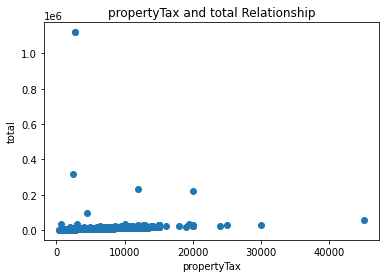

In [69]:
df_houses = pd.read_csv("/content/datasets/brazilian_houses.csv")
X = df_houses[["propertyTax"]]
Y = df_houses[["total"]]
plt.xlabel("propertyTax")
plt.ylabel("total")
plt.title("propertyTax and total Relationship")
plt.scatter(df_houses.rentAmount, df_houses.total)
plt.show()

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

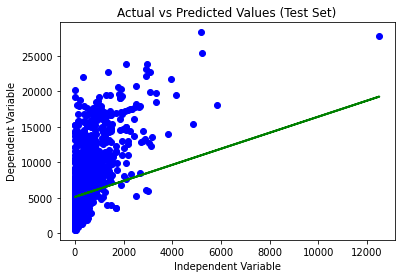

In [71]:
y_pred_test = model.predict(X_test)
plt.scatter(X_test, Y_test, color='blue')
plt.plot(X_test, y_pred_test, color='green', linewidth=2)
plt.title("Actual vs Predicted Values (Test Set)")
plt.xlabel("Independent Variable")
plt.ylabel("Dependent Variable")
plt.show()

In [72]:
r2score = r2_score(Y_test, y_pred_test)
print("Training set R2 SCORE: ", r2score)

Training set R2 SCORE:  0.18228122383711376


**Linear Regression with more dimensions**

1. brazilian_houses dataset

Perform linear regression on the dataset **before removing any outliers**:

In [73]:
df_houses = pd.read_csv("/content/datasets/brazilian_houses.csv")

# defined X and Y columns
Y_column = 'total'
all_columns = df_houses.columns.to_list()
X_columns = list(set(all_columns) - set([Y_column]))

# create X and Y
X = df_houses[X_columns]
Y = df_houses[Y_column]

# split to test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)

y_pred_test = model.predict(X_test)

mse = mean_squared_error(Y_test ,y_pred_test, squared=True)
print("MSE without removing outliers: ", mse)

rmse = mean_squared_error(Y_test, y_pred_test, squared=False)
print("RMSE without removing outliers: ", rmse)

r2score = r2_score(Y_test, y_pred_test)
print("R2 SCORE without removing outliers: ", r2score)

MSE without removing outliers:  1.08154933481661
RMSE without removing outliers:  1.0399756414534957
R2 SCORE without removing outliers:  0.9999999457114612


Perform linear regression on the dataset **after removing outliers by our algorithm**:

In [74]:
df_brazilian_houses = pd.read_csv("/content/datasets/brazilian_houses.csv")

data_frame_after_remove = detect_remove_outliers("brazilian_houses", df_houses, "propertyTax", 10, False)

# defined X and Y columns
Y_column = 'total'
all_columns = data_frame_after_remove.columns.to_list()
X_columns = list(set(all_columns) - set([Y_column]))

# create X and Y
X = data_frame_after_remove[X_columns]
Y = data_frame_after_remove[Y_column]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)

y_pred_test = model.predict(X_test)

mse = mean_squared_error(Y_test ,y_pred_test, squared=True)
print("MSE with outliers removed by our alg: ", mse)

rmse = mean_squared_error(Y_test, y_pred_test, squared=False)
print("RMSE with outliers removed by our alg: ", rmse)

r2score = r2_score(Y_test, y_pred_test)
print("R2 SCORE with outliers removed by our alg: ", r2score)

brazilian_houses : 507 outliers at propertyTax column
MSE with outliers removed by our alg:  0.8552746719657704
RMSE with outliers removed by our alg:  0.9248106141074347
R2 SCORE with outliers removed by our alg:  0.9999999210952768


Perform linear regression on the dataset **after removing outliers by the original modified z score algorithm**:

In [75]:
df_brazilian_houses = pd.read_csv("/content/datasets/brazilian_houses.csv")

data_frame_after_remove = detect_remove_outliers("brazilian_houses", df_houses, "propertyTax", 1, False)

# defined X and Y columns
Y_column = 'total'
all_columns = data_frame_after_remove.columns.to_list()
X_columns = list(set(all_columns) - set([Y_column]))

# create X and Y
X = data_frame_after_remove[X_columns]
Y = data_frame_after_remove[Y_column]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)

y_pred_test = model.predict(X_test)

mse = mean_squared_error(Y_test ,y_pred_test, squared=True)
print("MSE with outliers removed by the original modified z score: ", mse)

rmse = mean_squared_error(Y_test, y_pred_test, squared=False)
print("RMSE with outliers removed by the original modified z score: ", rmse)

r2score = r2_score(Y_test, y_pred_test)
print("R2 SCORE with outliers removed by the original modified z score: ", r2score)

brazilian_houses : 379 outliers at propertyTax column
MSE with outliers removed by the original modified z score:  0.745167379039189
RMSE with outliers removed by the original modified z score:  0.8632307797102632
R2 SCORE with outliers removed by the original modified z score:  0.9999999380117016


2. boston_houses dataset

Perform linear regression on the dataset **before removing any outliers**:

In [76]:
# boston houses Dataset contains 13 features that are used 
# to predict the median value (MEDV) of owner-occupied homes in a given suburb

# before removing outliers
df_boston = pd.read_csv("/content/datasets/boston_house_prices.csv")

# defined X and Y columns
Y_column = 'MEDV'
all_columns = df_boston.columns.to_list()
X_columns = list(set(all_columns) - set([Y_column]))

# create X and Y
X = df_boston[X_columns]
Y = df_boston[Y_column]

# split to test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)

y_pred_test = model.predict(X_test)

mse = mean_squared_error(Y_test ,y_pred_test, squared=True)
print("MSE without removing outliers: ", mse)

rmse = mean_squared_error(Y_test, y_pred_test, squared=False)
print("RMSE without removing outliers: ", rmse)

r2score = r2_score(Y_test, y_pred_test)
print("R2 SCORE without removing outliers: ", r2score)

MSE without removing outliers:  24.291119474973694
RMSE without removing outliers:  4.9286021826653545
R2 SCORE without removing outliers:  0.6687594935356296


Perform linear regression on the dataset **after removing outliers by our algorithm**:

In [77]:
df_boston = pd.read_csv("/content/datasets/boston_house_prices.csv")

data_frame_after_remove = detect_remove_outliers("boston_houses", df_boston_houses, "CRIM", 10, False)

# defined X and Y columns
Y_column = 'MEDV'
all_columns = data_frame_after_remove.columns.to_list()
X_columns = list(set(all_columns) - set([Y_column]))

# create X and Y
X = data_frame_after_remove[X_columns]
Y = data_frame_after_remove[Y_column]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)

y_pred_test = model.predict(X_test)

mse = mean_squared_error(Y_test ,y_pred_test, squared=True)
print("MSE with outliers removed by our alg: ", mse)

rmse = mean_squared_error(Y_test, y_pred_test, squared=False)
print("RMSE with outliers removed by our alg: ", rmse)

r2score = r2_score(Y_test, y_pred_test)
print("R2 SCORE with outliers removed by our alg: ", r2score)

boston_houses : 201 outliers at CRIM column
MSE with outliers removed by our alg:  8.069805224886455
RMSE with outliers removed by our alg:  2.8407402600178804
R2 SCORE with outliers removed by our alg:  0.7848204298654514


Perform linear regression on the dataset **after removing outliers by the original modified z score algorithm**:

In [78]:
df_boston = pd.read_csv("/content/datasets/boston_house_prices.csv")

data_frame_after_remove = detect_remove_outliers("boston_houses", df_boston_houses, "CRIM", 1, False)

# defined X and Y columns
Y_column = 'MEDV'
all_columns = data_frame_after_remove.columns.to_list()
X_columns = list(set(all_columns) - set([Y_column]))

# create X and Y
X = data_frame_after_remove[X_columns]
Y = data_frame_after_remove[Y_column]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)

y_pred_test = model.predict(X_test)

mse = mean_squared_error(Y_test ,y_pred_test, squared=True)
print("MSE with outliers removed by the original modified z score: ", mse)

rmse = mean_squared_error(Y_test, y_pred_test, squared=False)
print("RMSE with outliers removed by the original modified z score: ", rmse)

r2score = r2_score(Y_test, y_pred_test)
print("R2 SCORE with outliers removed by the original modified z score: ", r2score)

boston_houses : 77 outliers at CRIM column
MSE with outliers removed by the original modified z score:  27.7765583770755
RMSE with outliers removed by the original modified z score:  5.270347083169713
R2 SCORE with outliers removed by the original modified z score:  0.6927560499805233


3. iris dataset

Perform linear regression on the dataset **before removing any outliers**:

In [79]:
# The original Iris Dataset contains 3 species at 'Species' column: Iris-setosa,Iris-versicolor,
# Iris-virginica. Since the data we can work with is numeric, we change it into 0, 1, 2 correspondly.

# before removing outliers
df_iris = pd.read_csv("/content/datasets/iris.csv")

# defined X and Y columns
Y_column = 'Species'
all_columns = df_iris.columns.to_list()
X_columns = list(set(all_columns) - set([Y_column]))

# create X and Y
X = df_iris[X_columns]
Y = df_iris[Y_column]

# split to test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)

y_pred_test = model.predict(X_test)

mse = mean_squared_error(Y_test ,y_pred_test, squared=True)
print("MSE without removing outliers: ", mse)

rmse = mean_squared_error(Y_test, y_pred_test, squared=False)
print("RMSE without removing outliers: ", rmse)

r2score = r2_score(Y_test, y_pred_test)
print("R2 SCORE without removing outliers: ", r2score)

MSE without removing outliers:  0.037233644561975004
RMSE without removing outliers:  0.1929602149718304
R2 SCORE without removing outliers:  0.9467245149351708


Perform linear regression on the dataset **after removing outliers by our algorithm**:

In [80]:
df_iris = pd.read_csv("/content/datasets/iris.csv")

data_frame_after_remove = detect_remove_outliers("iris", df_iris, "PetalLengthCm", 10, False)

# defined X and Y columns
Y_column = 'Species'
all_columns = data_frame_after_remove.columns.to_list()
X_columns = list(set(all_columns) - set([Y_column]))

# create X and Y
X = data_frame_after_remove[X_columns]
Y = data_frame_after_remove[Y_column]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)

y_pred_test = model.predict(X_test)

mse = mean_squared_error(Y_test ,y_pred_test, squared=True)
print("MSE with outliers removed by our alg: ", mse)

rmse = mean_squared_error(Y_test, y_pred_test, squared=False)
print("RMSE with outliers removed by our alg: ", rmse)

r2score = r2_score(Y_test, y_pred_test)
print("R2 SCORE with outliers removed by our alg: ", r2score)

iris : There are no outliers at PetalLengthCm column
MSE with outliers removed by our alg:  0.037233644561975004
RMSE with outliers removed by our alg:  0.1929602149718304
R2 SCORE with outliers removed by our alg:  0.9467245149351708


Perform linear regression on the dataset **after removing outliers by the original modified z score algorithm**:

In [81]:
df_iris = pd.read_csv("/content/datasets/iris.csv")

data_frame_after_remove = detect_remove_outliers("iris", df_iris, "PetalLengthCm", 1, False)

# defined X and Y columns
Y_column = 'Species'
all_columns = data_frame_after_remove.columns.to_list()
X_columns = list(set(all_columns) - set([Y_column]))

# create X and Y
X = data_frame_after_remove[X_columns]
Y = data_frame_after_remove[Y_column]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)

y_pred_test = model.predict(X_test)

mse = mean_squared_error(Y_test ,y_pred_test, squared=True)
print("MSE with outliers removed by the original modified z score: ", mse)

rmse = mean_squared_error(Y_test, y_pred_test, squared=False)
print("RMSE with outliers removed by the original modified z score: ", rmse)

r2score = r2_score(Y_test, y_pred_test)
print("R2 SCORE with outliers removed by the original modified z score: ", r2score)

iris : There are no outliers at PetalLengthCm column
MSE with outliers removed by the original modified z score:  0.037233644561975004
RMSE with outliers removed by the original modified z score:  0.1929602149718304
R2 SCORE with outliers removed by the original modified z score:  0.9467245149351708


4. books dataset

Perform linear regression on the dataset **before removing any outliers**:

In [82]:
df_books = pd.read_csv("/content/datasets/goodreads_books.csv")

# defined X and Y columns
Y_column = 'average_rating'
all_columns = df_books.columns.to_list()
X_columns = list(set(all_columns) - set([Y_column]))

# create X and Y
X = df_books[X_columns]
Y = df_books[Y_column]

# split to test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)

y_pred_test = model.predict(X_test)

mse = mean_squared_error(Y_test ,y_pred_test, squared=True)
print("MSE without removing outliers: ", mse)

rmse = mean_squared_error(Y_test, y_pred_test, squared=False)
print("RMSE without removing outliers: ", rmse)

r2score = r2_score(Y_test, y_pred_test)
print("R2 SCORE without removing outliers: ", r2score)

MSE without removing outliers:  0.1175628888758848
RMSE without removing outliers:  0.34287445060238125
R2 SCORE without removing outliers:  0.028066427630215385


Perform linear regression on the dataset **after removing outliers by our algorithm**:

In [83]:
df_books = pd.read_csv("/content/datasets/goodreads_books.csv")

data_frame_after_remove = detect_remove_outliers("books", df_books, "num_pages", 10, False)

# defined X and Y columns
Y_column = 'average_rating'
all_columns = data_frame_after_remove.columns.to_list()
X_columns = list(set(all_columns) - set([Y_column]))

# create X and Y
X = data_frame_after_remove[X_columns]
Y = data_frame_after_remove[Y_column]

# split to test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)

y_pred_test = model.predict(X_test)

mse = mean_squared_error(Y_test ,y_pred_test, squared=True)
print("MSE with outliers removed by our alg: ", mse)

rmse = mean_squared_error(Y_test, y_pred_test, squared=False)
print("RMSE with outliers removed by our alg: ", rmse)

r2score = r2_score(Y_test, y_pred_test)
print("R2 SCORE with outliers removed by our alg: ", r2score)

books : 102 outliers at num_pages column
MSE with outliers removed by our alg:  0.1317994573210612
RMSE with outliers removed by our alg:  0.36304194980891835
R2 SCORE with outliers removed by our alg:  0.021169322522062606


Perform linear regression on the dataset **after removing outliers by the original modified z score algorithm**:

In [84]:
df_books = pd.read_csv("/content/datasets/goodreads_books.csv")

data_frame_after_remove = detect_remove_outliers("books", df_books, "num_pages", 1, False)

# defined X and Y columns
Y_column = 'average_rating'
all_columns = data_frame_after_remove.columns.to_list()
X_columns = list(set(all_columns) - set([Y_column]))

# create X and Y
X = data_frame_after_remove[X_columns]
Y = data_frame_after_remove[Y_column]

# split to test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)

y_pred_test = model.predict(X_test)

mse = mean_squared_error(Y_test ,y_pred_test, squared=True)
print("MSE with outliers removed by the original modified z score: ", mse)

rmse = mean_squared_error(Y_test, y_pred_test, squared=False)
print("RMSE with outliers removed by the original modified z score: ", rmse)

r2score = r2_score(Y_test, y_pred_test)
print("R2 SCORE with outliers removed by the original modified z score: ", r2score)

books : 87 outliers at num_pages column
MSE with outliers removed by the original modified z score:  0.11433284100624527
RMSE with outliers removed by the original modified z score:  0.3381313960670397
R2 SCORE with outliers removed by the original modified z score:  0.018960298500731887


**Boxplot distribution before and after removing outliers by our algorithm.**

brazilian_houses : 507 outliers at propertyTax column


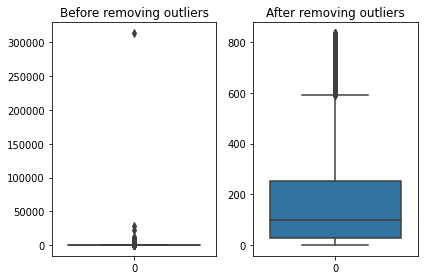

boston_houses : 201 outliers at CRIM column


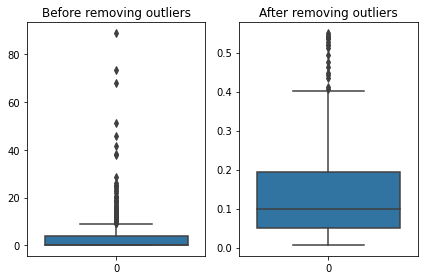

books : 102 outliers at num_pages column


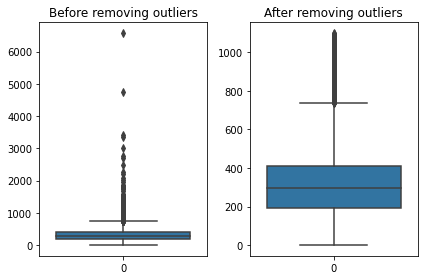

In [85]:
df_after_remove = detect_remove_outliers("brazilian_houses", df_brazilian_houses, "propertyTax", 10, False)
f, axes = plt.subplots(1, 2)
sns.boxplot(data=df_brazilian_houses["propertyTax"],ax=axes[0])
sns.boxplot(data=df_after_remove["propertyTax"],ax=axes[1])
axes[0].set_title('Before removing outliers')
axes[1].set_title('After removing outliers')
f.tight_layout()
plt.show()

df_after_remove = detect_remove_outliers("boston_houses", df_boston_houses, "CRIM", 10, False)
f, axes = plt.subplots(1, 2)
sns.boxplot(data=df_boston_houses["CRIM"],ax=axes[0])
sns.boxplot(data=df_after_remove["CRIM"],ax=axes[1])
axes[0].set_title('Before removing outliers')
axes[1].set_title('After removing outliers')
f.tight_layout()
plt.show()


df_after_remove = detect_remove_outliers("books", df_books, "num_pages", 10, False)
f, axes = plt.subplots(1, 2)
sns.boxplot(data=df_books["num_pages"],ax=axes[0])
sns.boxplot(data=df_after_remove["num_pages"],ax=axes[1])
axes[0].set_title('Before removing outliers')
axes[1].set_title('After removing outliers')
f.tight_layout()
plt.show()